In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [14]:
data_1=pd.read_csv('Data_set/wdbc.data',sep=',',header=None)
data_1.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data_1.rename(columns={0:'id',1:'diagnosis',2:'radius_mean',3:'texture_mean',4:'perimeter_mean',5:'area_mean',6:'smoothness_mean',7:'compactness_mean',8:'concavity_mean',9:'concave points_mean',10:'concave_points_mean',11:'symmetry_mean',12:'fractal_dimension_mean',13:'radius_se',14:'texture_se',15:'perimeter_se',16:'area_se',17:'smoothness_se',18:'compactness_se',19:'concavity_se',20:'concave points_se',21:'symmetry_se',22:'fractal_dimension_se',23:'radius_worst',24:'texture_worst',25:'perimeter_worst',26:'area_worst',27:'smoothness_worst',28:'compactness_worst',29:'concavity_worst',30:'concave points_worst',31:'symmetry_worst',32:'fractal_dimension_worst'},inplace=True)

In [16]:
data_1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
data_1.columns
print(np.shape(data_1))

(569, 32)


In [18]:
data_1.dropna(subset=['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst'],inplace=True)

In [19]:
print(np.shape(data_1))

(569, 32)


In [20]:
data_1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
data_1.replace({'B':0,'M':1},inplace=True)
data_1.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [25]:
x=np.array(data_1.iloc[:,2:32])
y=np.array(data_1['diagnosis'])
print(np.shape(x))
print(np.shape(y))

(569, 30)
(569,)


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
r,c= np.shape(X_train)
print(r,c)
s=np.zeros((r,c))
#print(np.shape(s))
for i in range(0,r):
    for j in range(0,c):
        s[i][j]=(X_train[i][j]/(max(X_train[:,j])-min(X_train[:,j])))
print(np.shape(s))
#s1=np.transpose(s)
m=len(s)
        

455 30
(455, 30)


In [80]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(s)
principalPD=pd.DataFrame(data=principalComponents,
                        columns=['principal component 1','principal component 2'])

In [81]:
principalPD.head()

,principal component 1,principal component 2
0,-0.508624,0.166200
1,-0.394055,0.035758
2,-0.087966,-0.283852
3,-0.443348,0.018401
4,-0.426669,-0.175580


In [82]:
xp1=np.array((principalPD['principal component 1']))
xp2=np.array((principalPD['principal component 2']))
print(np.shape(xp1),np.shape(xp2))

(455,) (455,)


In [83]:
212+357

569

(1, 165) (1, 290)


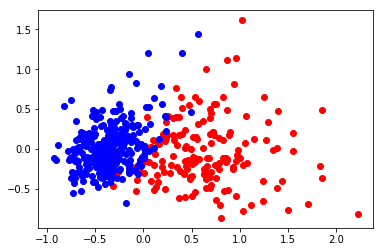

In [86]:
inp=np.where(Y_train==1)
inn=np.where(Y_train==0)
#print(inp)
print(np.shape(inp),np.shape(inn))
plt.plot(xp1[inp],xp2[inp],'ro')
plt.plot(xp1[inn],xp2[inn],'bo')
plt.show()

In [91]:
x=np.array((xp1,xp2))
print(np.shape(x))
x0=np.ones((1,r))
x1=np.concatenate((x0,x))
print(np.shape(x1))
x2=np.transpose(x1)
print(np.shape(x2))

(2, 455)
(3, 455)
(455, 3)


In [120]:
k=0
alpha=0.1
r,c= np.shape(x2)
theta=np.zeros((1,c))
theta=(theta)
print(np.shape(theta),np.shape([x2[0]]))
sigm=[]
while k<3000:
    cost=0
    er=np.zeros((c,1))
    for i in range(0,r):
        for j in range(0,c):
            h=np.matmul(theta,np.transpose([x2[i]]))
            z_1=1/(1+math.exp(-h))
            if z_1 !=0 and z_1!=1.0:
                j1=((1/m)*(-Y_train[i]*math.log(z_1))-((1-Y_train[i])*math.log(1-z_1)))
                cost+=j1
                er[j]=er[j]+(z_1-Y_train[i])*x2[i][j]
    for d in range(0,c):
        theta[0][d]=theta[0][d]-alpha*(1/r)*er[d]
    
    k+=1
    sigm.append(j1)
print(theta)
print(sigm[-1])

(1, 3) (1, 3)
[[-0.70886539  7.66155957 -2.41237997]]
0.09395794827709708


In [ ]:
theta1=(())

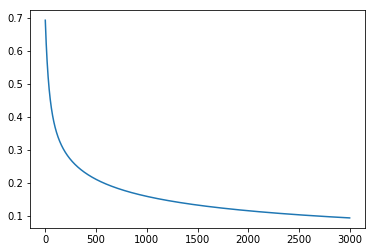

In [121]:
plt.plot(sigm,"-")

In [122]:
y_hat=np.matmul(theta,np.transpose(x2))   # Yhat value we are finding
yhat=np.zeros(np.size((y_hat)))
print(np.shape(y_hat))
for i in range(r):
    if y_hat[0][i]>0.5:
        yhat[i]=1
#print(y_hat)

(1, 455)


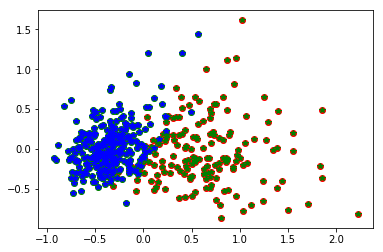

In [123]:
ipos=np.where(Y_train==1)
ineg=np.where(Y_train==0)
plt.plot(xp1[inp],xp2[inp],'ro',linewidth=2)
plt.plot(xp1[inn],xp2[inn],'go',linewidth=100)
plt.plot(xp1[ipos],xp2[ipos],'g*')
plt.plot(xp1[ineg],xp2[ineg],'b*')
plt.show()

In [124]:
tr=abs(np.sum(yhat-Y_train)/(len(Y_train)))
accuracy=(1-tr)*100
print('accuracy:',accuracy)

accuracy: 94.94505494505493


## Testing 

In [145]:
r,c= np.shape(X_test)
print(r,c)
s=np.zeros((r,c))
#print(np.shape(s))
for i in range(0,r):
    for j in range(0,c):
        s[i][j]=(X_test[i][j]/(max(X_test[:,j])-min(X_test[:,j])))
print(np.shape(s))
#s1=np.transpose(s)
m1=len(s)
print((max(X_test[:,j]))-(min(X_test[:,j])))

114 30
(114, 30)
0.08445


In [146]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(s)
principalPD=pd.DataFrame(data=principalComponents,
                        columns=['principal component 1','principal component 2'])

In [147]:
xp_1=np.array((principalPD['principal component 1']))
xp_2=np.array((principalPD['principal component 2']))
print(np.shape(xp_1),np.shape(xp_2))

(114,) (114,)


(1, 47) (1, 67)


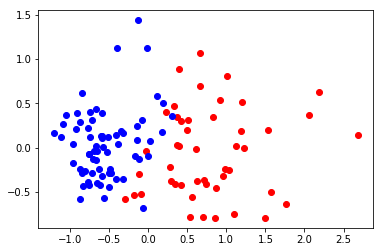

In [149]:
x=np.array((xp_1,xp_2))
print(np.shape(x))
x0=np.ones((1,r))
x1=np.concatenate((x0,x))
print(np.shape(x1))
x3=np.transpose(x1)
print(np.shape(x3))

(2, 114)
(3, 114)
(114, 3)


In [154]:
y_hat1=np.matmul(theta,np.transpose(x2))   # Yhat value we are finding
yhat1=np.zeros(np.size((y_hat1)))
print(np.shape(y_hat1))
for i in range(m):
    if y_hat1[0][i]>0.5:
        yhat1[i]=1
#print(y_hat)

(1, 114)


(1, 42) (1, 72)


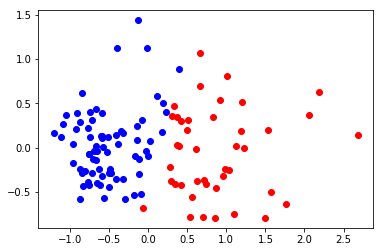

In [155]:
inp=np.where(yhat1==1)
inn=np.where(yhat1==0)
#print(inp)
print(np.shape(inp),np.shape(inn))
plt.plot(xp_1[inp],xp_2[inp],'ro')
plt.plot(xp_1[inn],xp_2[inn],'bo')
plt.show()

In [158]:
tr_test=abs(np.sum(yhat1-Y_test)/(len(Y_test)))
accuracy=(1-tr_test)*100
print('accuracy:',accuracy)

accuracy: 95.6140350877193
